In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import math 
import seaborn as sns
import numpy as np

imdb_movies=pd.read_csv("./data/IMDb movies.csv")
imdb_ratings=pd.read_csv("./data/IMDb ratings.csv")
movies_rating_merge=imdb_movies.merge(imdb_ratings,on="imdb_title_id")


<ipython-input-3-2085fccbc9d9>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(axes.get_xticks(),size=20)
<ipython-input-3-2085fccbc9d9>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(axes.get_yticks(),size=20)


Text(0.5, 1.0, 'top10 country avgvote')

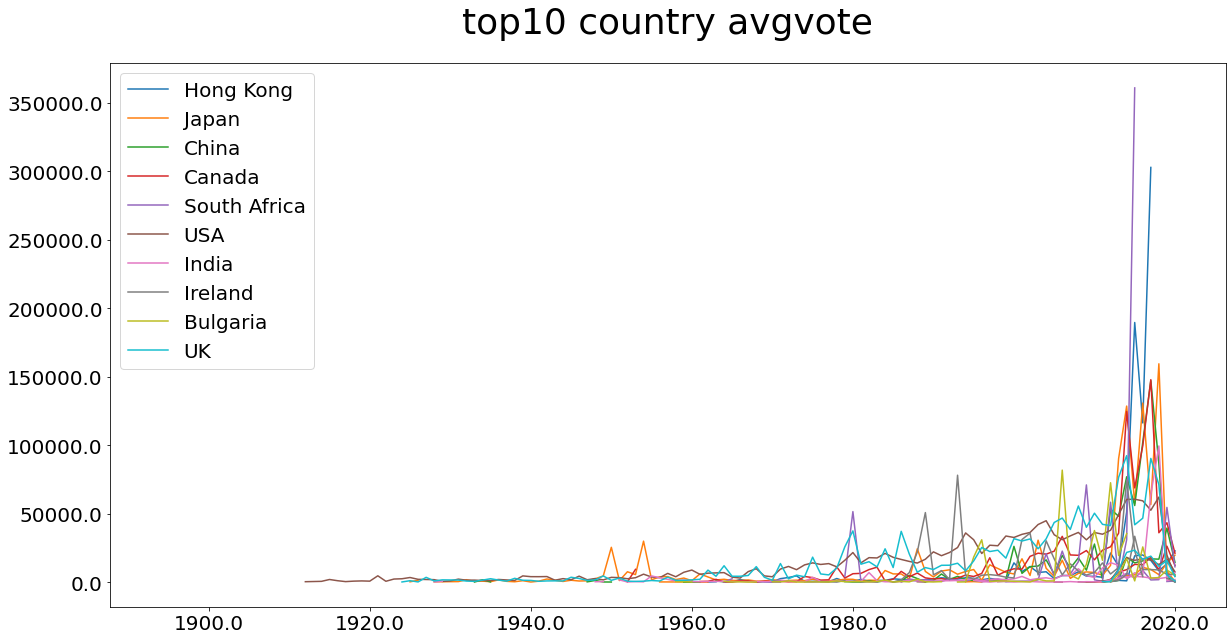

In [3]:
# 연도에 따라 나라별 투표수가 높은 top10 시각화

df=movies_rating_merge[["year","country","votes"]]

# 두가지 이상 들어가있는 나라분리해주기
lists=[]
for i in df.iloc:
    for j in str(i["country"]).split(","):
        dic={"country":j.strip(),"votes":i["votes"],"year":i["year"]}
        lists.append(dic)
new_df=pd.DataFrame(lists)

# 연도가 아닌 값 지워주기(TV Movie 2019)
#new_df["year"].unique()

new_df=new_df[new_df["year"]!="TV Movie 2019"]
#new_df["year"].unique()

# pivot_table(df, 데이터 ,행 위치, 열 위치, 집계함수)
pivot=pd.pivot_table(new_df,values="votes",index="country",columns=["year"],aggfunc="mean")
pivot.fillna(0)

# 최근 년도를 기준으로 정렬하여 나라별 높은 votes top10 시각화 
fig,axes=plt.subplots(1,figsize=(20,10))

top10=pivot.sort_values("2020",ascending=False).head(10)
top10.fillna(0)

for i in top10.iloc:
    axes.plot(i.index,i.to_numpy(),label=i.name)
axes.legend(loc=2,fontsize=20)
axes.set_xticklabels(axes.get_xticks(),size=20)
axes.set_yticklabels(axes.get_yticks(),size=20)
axes.set_title("top10 country avgvote",size=36,pad=30)


<BarContainer object of 20 artists>

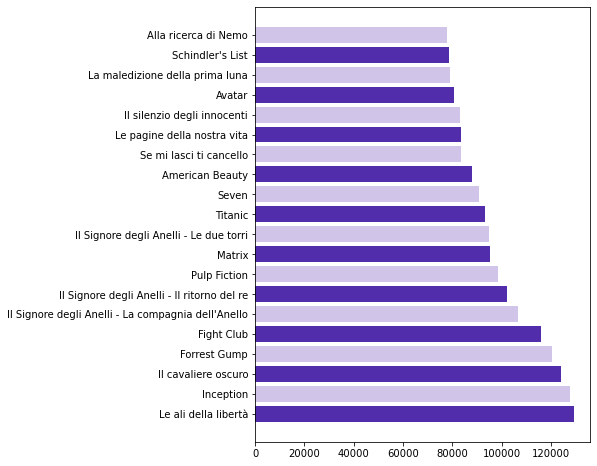

In [141]:
# barh을 이용해 18에서 30살 사이의 여성들이 평가한 평점이 높은 title 순으로 시각화 
fig,axes=plt.subplots(1,figsize=(6,8))

top20=movies_rating_merge.sort_values("females_30age_votes",ascending=False).head(20)
top20=top20[["title","females_30age_votes"]]

axes.barh(y=top20["title"],width=top20["females_30age_votes"],color=["#512DAB","#D1C4E9"])

<ipython-input-218-20429618347f>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(top10.index,size=20)
<ipython-input-218-20429618347f>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(axes.get_yticks(),size=20)


Text(0.5, 1.0, 'Visualize top 10 votes received by directors')

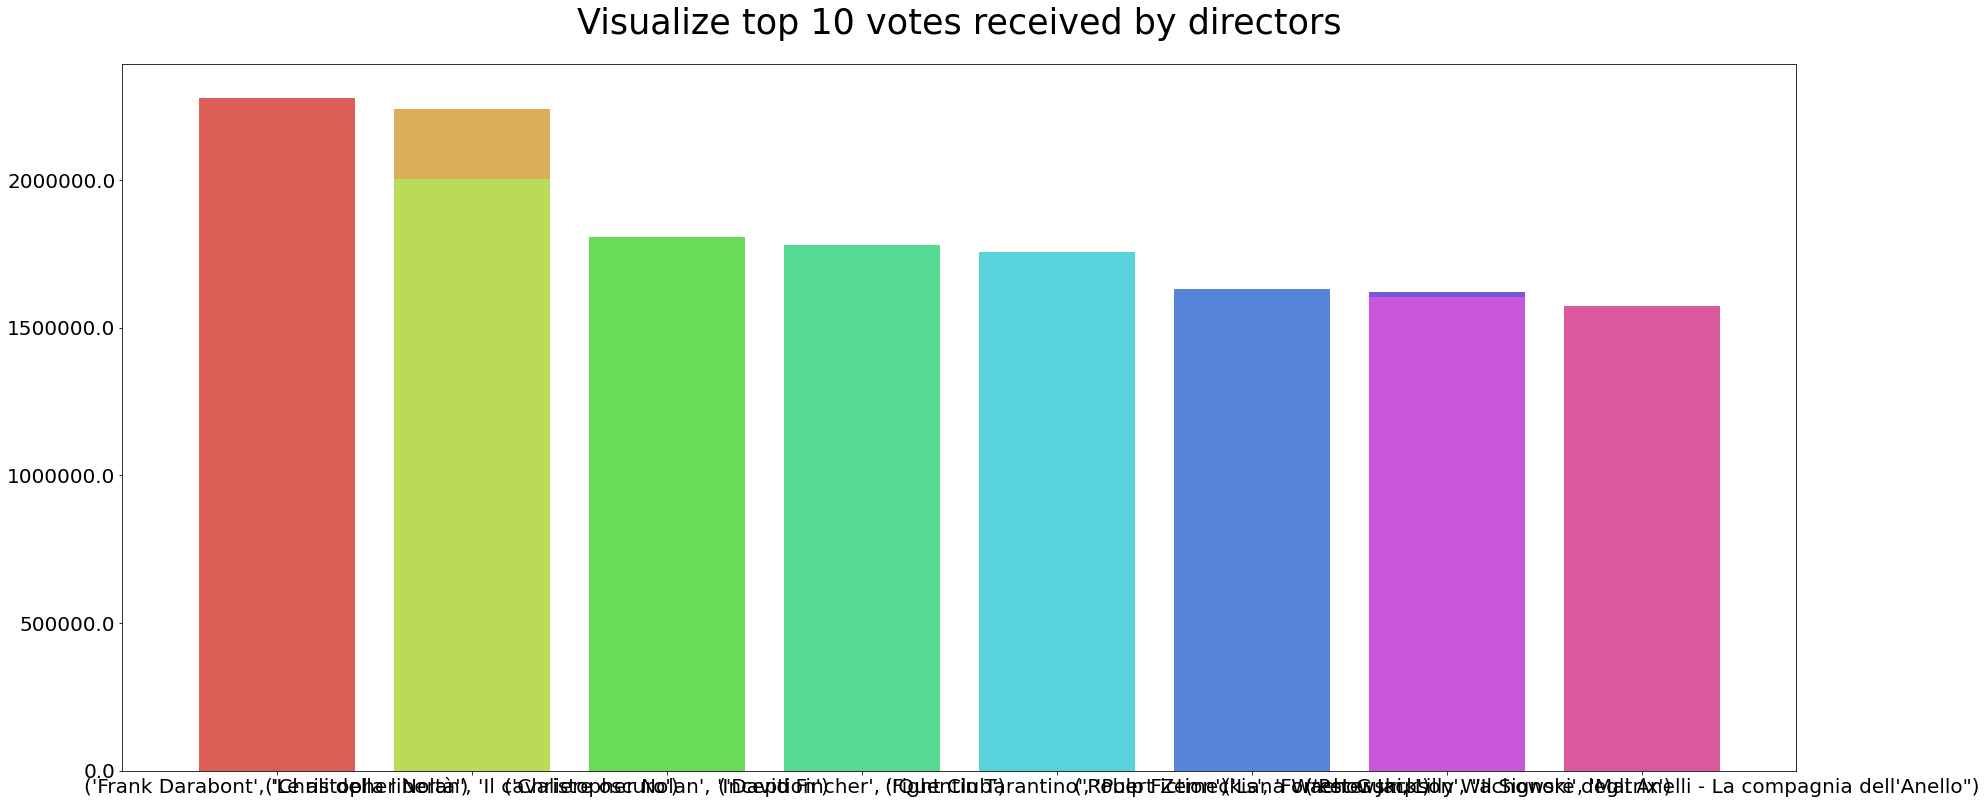

In [218]:
# 감독별 작품들이 받은 투표 수 top10 시각화 
new_df1=movies_rating_merge[["director","title","total_votes"]]
new_df1=new_df1.groupby(['director',"title"]).mean()

top10=new_df1.sort_values("total_votes",ascending=False).head(10)

fig,axes=plt.subplots(1,figsize=(30,13))

name=[]
for i in top10.index:
    name.append(i[0])
# print(name)

colors = sns.color_palette('hls',len(name))
    
axes.bar(height=top10["total_votes"],x=name,color=colors)

#axes.legend(len(name),data.name,ncol=1, loc='center right',bbox_to_anchor=(0.5,-0.07))

axes.set_xticklabels(top10.index,size=20)
axes.set_yticklabels(axes.get_yticks(),size=20)
axes.set_title("Visualize top 10 votes received by directors",size=35,pad=30)

In [279]:
mv_df=movies_rating_merge[movies_rating_merge["year"]==2020]
mv_df=mv_df[["imdb_title_id","votes","non_us_voters_votes"]]
mv_df=mv_df[mv_df["votes"]<10000]
mv_df=mv_df[mv_df["non_us_voters_votes"]<3000]
len(mv_df["non_us_voters_votes"])

371

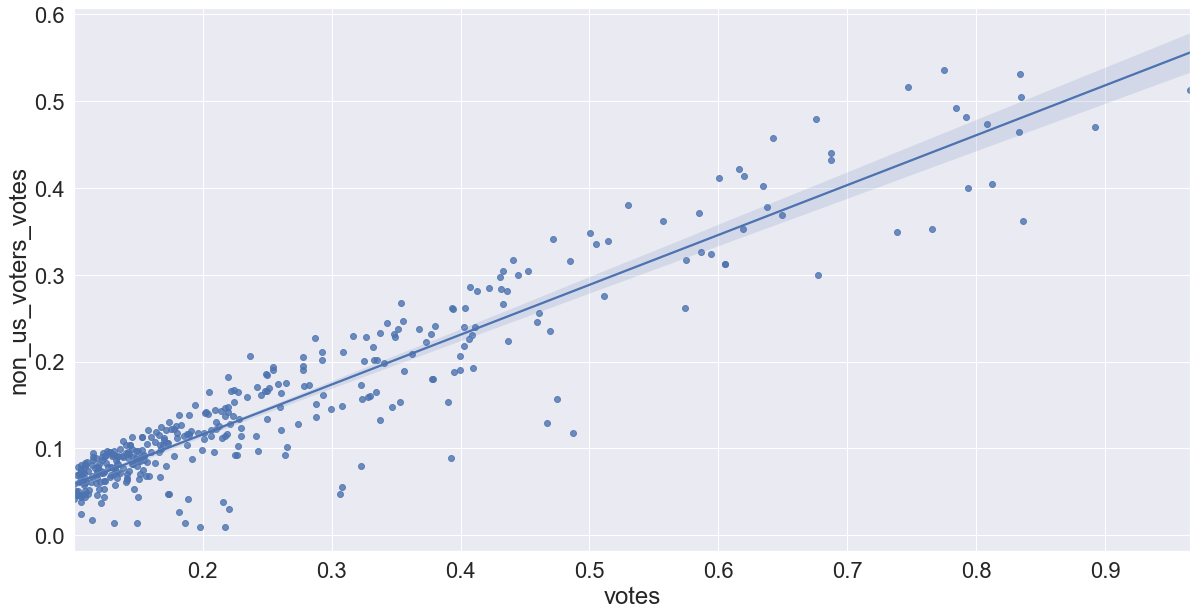

In [300]:
fig,ax=plt.subplots(1,figsize=(20,10))

# 2020년도만 추출
mv_df=movies_rating_merge[movies_rating_merge["year"]==2020]

mv_df=mv_df[["imdb_title_id","votes","non_us_voters_votes"]]

mv_df=mv_df[mv_df["votes"]<10000]
mv_df["votes"]=mv_df["votes"].apply(lambda x:math.sqrt(x)/100)

mv_df=mv_df[mv_df["non_us_voters_votes"]<3000]
mv_df["non_us_voters_votes"]=mv_df["non_us_voters_votes"].apply(lambda x:math.sqrt(x)/100)

#ax.scatter(mv_df["votes"],mv_df["reviews_from_users"])

import seaborn as sns
# 상관관계 시각화 
# regplot()는 산점도를 시각화 한다 
sns.regplot(x=mv_df["votes"],y=mv_df["non_us_voters_votes"])
sns.set(font_scale = 2)

- KMeans\
    : 군집 중심점을 선택하고 선택된 중심에 가장 가까운 포인트들을 선택하는 군집화 방법
    - 군집 중심점(centroid)
        - 선택된 포인트의 평균 지점으로 이동하고 이동된 중심점에서 다시 가까운 포인트를 선택하는 과정 반복
        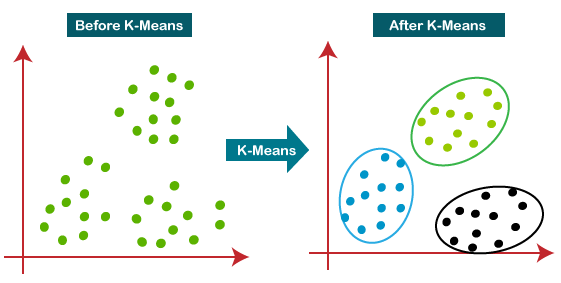
        


<ipython-input-34-3570d3f7f904>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes.get_yticks(),size=20)
<ipython-input-34-3570d3f7f904>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(axes.get_yticks(),size=20)


Text(0.5, 1.0, 'k-means of arbitrarily determined classes')

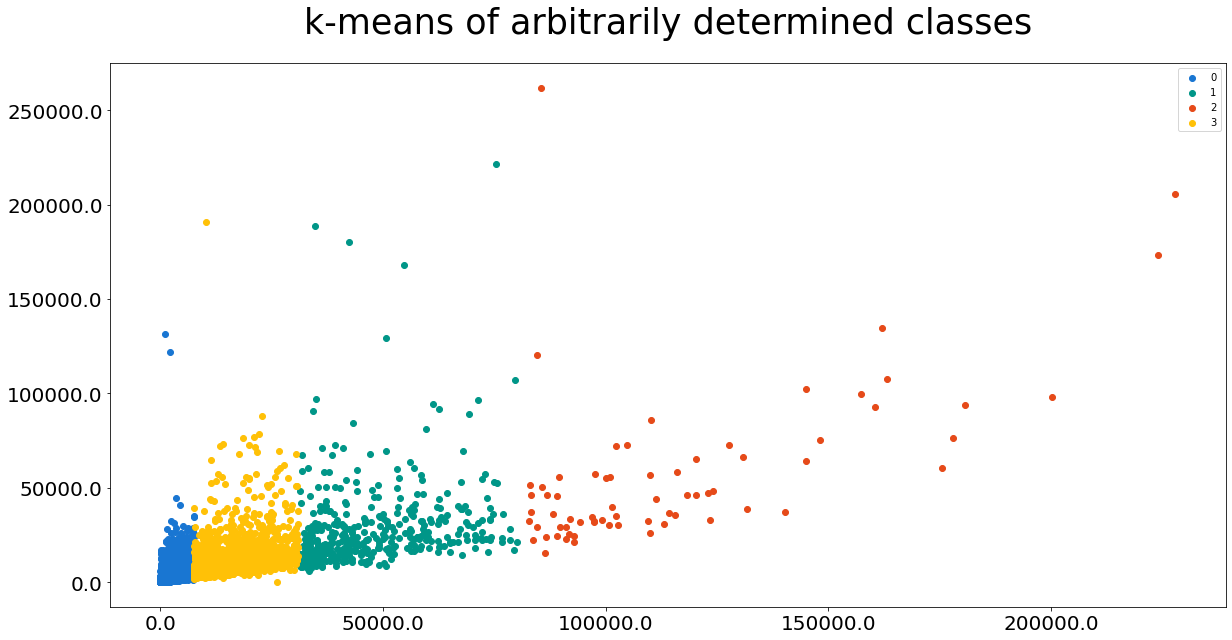

In [34]:
# K-Mean 군집화
from sklearn.cluster import KMeans
import numpy as np

movies_rating_merge["reviews_from_users"]=movies_rating_merge["reviews_from_users"].fillna(0)

X=movies_rating_merge[["votes","reviews_from_users"]].to_numpy()
# KMeans(n_clusters : 군집화 할 개수, max_iter : 최대 반복 횟수)


km=KMeans(n_clusters=4, max_iter=300)
km.fit(X)
#print(km.predict(np.array([[50.0,3.0]])))
movies_rating_merge["predcit"]=km.predict(X)
movies_rating_merge["predcit"]

colors=["#1976D2","#009688","#E64A19","#FFC107"]
fig,ax=plt.subplots(1,figsize=(20,10))
for i in range(4):
    pr_df=movies_rating_merge[movies_rating_merge["predcit"]==i]
    ax.scatter(pr_df["votes"],pr_df["reviews_from_users"],label=i,color=colors[i])
ax.legend()
ax.set_xticklabels(axes.get_yticks(),size=20)
ax.set_yticklabels(axes.get_yticks(),size=20)
ax.set_title("k-means of arbitrarily determined classes",size=35,pad=30)



In [288]:
#https://www.analyticsvidhya.com/blog/2021/04/k-means-clustering-simplified-in-python/ 
#머신러닝 완벽 가이드